# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | If you can’t fly First Class...
1,Not Verified | Singapore to Heathrow. Busine...
2,Not Verified | I reported my damaged/ruined ...
3,"Not Verified | On March 1st, I flew from Ber..."
4,Not Verified | The WORST customer experience! ...


In [10]:
output_path = r"C:\Users\jatin\OneDrive\Desktop\Data Science Course - British Airways\BA_reviews.csv"
df.to_csv(output_path, index=False)

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [15]:
# Create a DataFrame from the reviews
df = pd.DataFrame(reviews, columns=["reviews"])

# Display the first few rows of the dataframe before cleaning
print("Before cleaning:")
print(df.head())

# Clean the reviews by removing unnecessary text
df["reviews"] = df["reviews"].str.replace("✅ Trip Verified", "", regex=False)
df["reviews"] = df["reviews"].str.replace("Not Verified", "", regex=False)
df["reviews"] = df["reviews"].str.strip()

# Display the first few rows of the dataframe after cleaning
print("After cleaning:")
print(df.head())

# Save the cleaned DataFrame to a CSV file in the specified directory
output_path = r"C:\Users\jatin\OneDrive\Desktop\Data Science Course - British Airways\BA_reviews_cleaned.csv"
df.to_csv(output_path, index=False)

Before cleaning:
                                             reviews
0  ✅ Trip Verified | If you can’t fly First Class...
1  Not Verified |   Singapore to Heathrow. Busine...
2  Not Verified |   I reported my damaged/ruined ...
3  Not Verified |   On March 1st, I flew from Ber...
4  Not Verified | The WORST customer experience! ...
After cleaning:
                                             reviews
0  | If you can’t fly First Class don’t fly Briti...
1  |   Singapore to Heathrow. Business class on a...
2  |   I reported my damaged/ruined suitcase 5 we...
3  |   On March 1st, I flew from Berlin to São Pa...
4  | The WORST customer experience! British Airwa...


In [17]:
# Cleaning functions
import re

def clean_review(review):
    # Remove "✅ Trip Verified" and "Not Verified"
    review = review.replace("✅ Trip Verified", "").replace("Not Verified", "")
    
    # Remove HTML tags if any
    review = re.sub(r'<.*?>', '', review)
    
    # Normalize text (convert to lowercase)
    review = review.lower()
    
    # Remove punctuation
    review = re.sub(r'[^\w\s]', '', review)
    
    # Strip leading and trailing whitespace
    review = review.strip()
    
    return review

# Apply the cleaning function to each review
df["reviews"] = df["reviews"].apply(clean_review)

# Remove duplicates
df = df.drop_duplicates()

# Display the first few rows of the dataframe after cleaning
print("After cleaning:")
print(df.head())

# Save the cleaned DataFrame to a CSV file in the specified directory
output_path = r"C:\Users\jatin\OneDrive\Desktop\Data Science Course - British Airways\BA_reviews_cleaned.csv"
df.to_csv(output_path, index=False)

After cleaning:
                                             reviews
0  if you cant fly first class dont fly british a...
1  singapore to heathrow business class on an a38...
2  i reported my damagedruined suitcase 5 weeks a...
3  on march 1st i flew from berlin to são paulo w...
4  the worst customer experience british airways ...


In [21]:
!pip install textblob


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------- ----------------------------- 163.8/626.3 kB 3.3 MB/s eta 0:00:01
   ---------------------------- ----------- 440.3/626.3 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.2/1.5 MB 5.3 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.5 MB 5.0 MB/s eta 0:00:01
   ----------------- ---------------------- 0.7/1.5 MB 5.2 MB/s eta 0:00:01
   ----------------------- ---------------- 0.9/1.5 MB 5.1 MB/s eta 0:00:01
   ---------------------------- ----------- 1.1/1.5 MB 4.9 MB/s eta 0:00:01
   -------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jatin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [23]:
from textblob import TextBlob
import pandas as pd

# Load your DataFrame
# df = pd.read_csv(r"C:\Users\jatin\OneDrive\Desktop\Data Science Course - British Airways\BA_reviews_cleaned.csv")

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['reviews'].apply(get_sentiment)

# Display the sentiment distribution
print(df['sentiment'].value_counts())


sentiment
Positive    619
Negative    371
Neutral      10
Name: count, dtype: int64


In [25]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ------------------------------ --------- 225.3/300.2 kB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 4.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


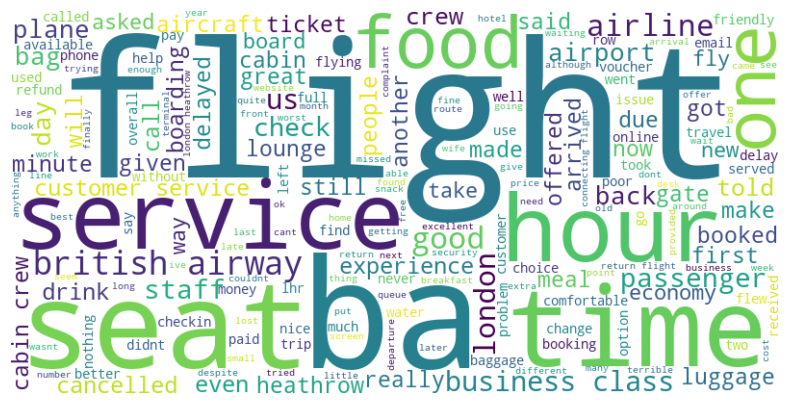

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Load your DataFrame
# df = pd.read_csv(r"C:\Users\jatin\OneDrive\Desktop\Data Science Course - British Airways\BA_reviews_cleaned.csv")

# Combine all reviews into a single text
text = ' '.join(df['reviews'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [29]:
!pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a document-term matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['reviews'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(X)

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.4/11.0 MB 11.6 MB/s eta 0:00:01
   -- ------------------------------------- 0.8/11.0 MB 10.2 MB/s eta 0:00:01
   ---- ----------------------------------- 1.1/11.0 MB 10.2 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/11.0 MB 9.8 MB/s eta 0:00:01
   -------- ------------------------------- 2.2/11.0 MB 10.0 MB/s eta 0:00:01
   --------- ------------------------------ 2.7/11.0 MB 9.4 MB/s eta 0:00:01
   ----------- ---------------------------- 3.2/11.0 MB 10.1 MB/s eta 0:00:01
   ------------- -------------------------- 3.6/11.0 MB 10.1 MB/s eta 0:00:01
   --------------- ------------------------ 4.1/11.0 MB 9.8 MB/s eta 0:00:01
   ---------------- ----------------------- 4.6/11.0 MB 9.8 MB/s eta 0:00:01
   ------------------ --------------------- 5.1/11.0 MB 9.9 MB/s eta 0:00:01


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Topic #1:
to the and my they was that for flight me
Topic #2:
to and the for of is in they my this
Topic #3:
the and was to of in on flight with were
Topic #4:
the to and was of in on for at flight
Topic #5:
the to we and our flight was in us were


count    1000.000000
mean      816.616000
std       575.410114
min       125.000000
25%       416.000000
50%       662.000000
75%      1031.000000
max      3431.000000
Name: review_length, dtype: float64


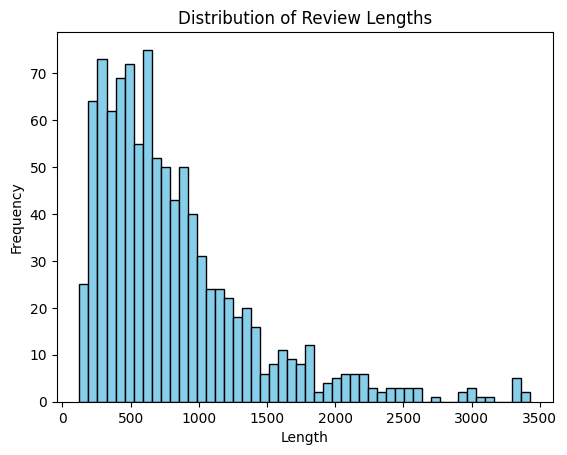

In [30]:
# Review Lengths
df['review_length'] = df['reviews'].apply(len)

# Summary statistics
print(df['review_length'].describe())

# Plot distribution of review lengths
plt.hist(df['review_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
X = vectorizer.fit_transform(df['reviews'])
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Sum TF-IDF scores for each term
term_scores = df_tfidf.sum().sort_values(ascending=False)
print(term_scores.head(20))

flight             34.398650
ba                 25.492940
service            18.110378
london             15.067717
time               14.936864
class              14.799014
seat               14.371023
good               14.347511
crew               14.211932
food               13.698275
business           13.598586
british            13.494492
seats              13.229428
airways            13.220951
staff              13.005847
british airways    12.997663
cabin              12.528468
hours              11.766657
business class     11.567745
heathrow           10.900616
dtype: float64


In [34]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import string

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Load data
df = pd.read_csv('BA_reviews_cleaned.csv')

# Preprocess text
def preprocess_text(text):
    # Tokenize
    words = word_tokenize(text.lower())
    # Remove punctuation and stopwords
    words = [word for word in words if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(words)

df['clean_reviews'] = df['reviews'].apply(preprocess_text)

# Vectorize text
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_reviews'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(X)

# Display topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx+1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jatin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jatin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic #1:
['flights', 'water', 'flight', 'customer', 'service', 'ba', 'cabin', 'staff', 'british', 'airways']
Topic #2:
['london', 'told', 'hours', 'airways', 'customer', 'service', 'british', 'us', 'ba', 'flight']
Topic #3:
['economy', 'cabin', 'seats', 'seat', 'service', 'food', 'flight', 'business', 'class', 'ba']
Topic #4:
['club', 'food', 'boarding', 'cabin', 'service', 'time', 'ba', 'good', 'crew', 'flight']
Topic #5:
['experience', 'london', 'cabin', 'ba', 'food', 'business', 'economy', 'class', 'seats', 'seat']


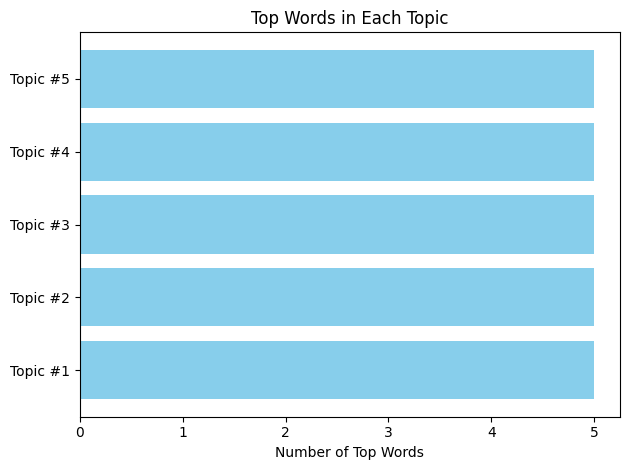

In [35]:
import matplotlib.pyplot as plt

# Example data
topics = {
    'Topic #1': ['flights', 'water', 'flight', 'customer', 'service', 'ba', 'cabin', 'staff', 'british', 'airways'],
    'Topic #2': ['london', 'told', 'hours', 'airways', 'customer', 'service', 'british', 'us', 'ba', 'flight'],
    'Topic #3': ['economy', 'cabin', 'seats', 'seat', 'service', 'food', 'flight', 'business', 'class', 'ba'],
    'Topic #4': ['club', 'food', 'boarding', 'cabin', 'service', 'time', 'ba', 'good', 'crew', 'flight'],
    'Topic #5': ['experience', 'london', 'cabin', 'ba', 'food', 'business', 'economy', 'class', 'seats', 'seat']
}

# Prepare data for plotting
topic_words = {key: value[:5] for key, value in topics.items()}  # Use top 5 words for simplicity
labels = list(topic_words.keys())
data = [len(words) for words in topic_words.values()]

# Plot bar chart
fig, ax = plt.subplots()
ax.barh(labels, data, color='skyblue')
ax.set_xlabel('Number of Top Words')
ax.set_title('Top Words in Each Topic')

# Save plot as image
plt.tight_layout()
plt.savefig('topic_modeling_bar_chart.png')


In [37]:
# Function to print the words in a topic
def print_topic_words(lda_model, topic_num, num_words=10):
    words = lda_model.show_topic(topic_num, topn=num_words)
    words = [word for word, _ in words]
    return words

# Iterate over each main topic
for i in range(5):  # Assuming 5 main topics
    print(f"Main Topic #{i+1}:")
    print(print_topic_words(lda_model, i))
    print("")

# Dive deeper into each topic by extracting reviews related to each topic
for i in range(5):  # Assuming 5 main topics
    topic_reviews = [texts[j] for j, c in enumerate(corpus) if lda_model[c][0][0] == i]
    topic_dictionary = corpora.Dictionary(topic_reviews)
    topic_corpus = [topic_dictionary.doc2bow(text) for text in topic_reviews]

    # Build sub-topic LDA model
    sub_lda_model = gensim.models.LdaMulticore(topic_corpus, num_topics=3, id2word=topic_dictionary, passes=10, workers=2)
    
    print(f"Sub-Topics for Main Topic #{i+1}:")
    for j in range(3):  # Assuming 3 sub-topics per main topic
        print(f"  Sub-Topic #{j+1}:")
        print(print_topic_words(sub_lda_model, j))
        print("")

    # Optionally, visualize sub-topics
    sub_vis = gensimvis.prepare(sub_lda_model, topic_corpus, topic_dictionary)
    pyLDAvis.display(sub_vis)


Main Topic #1:


NameError: name 'lda_model' is not defined